<a href="https://colab.research.google.com/github/Syed-MuhammadTaha/MultiLinRegNoLibs/blob/main/MultiLinRegNoLibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
text = '/content/home.txt'
df = pd.read_csv(text, sep=',', names=['size', 'bedroom', 'price'])

In [19]:
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
df.shape

(47, 3)

In [21]:
df = (df - df.mean())/df.std()
df.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [51]:
X = df.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = df.iloc[:, -1].values.reshape(X.shape[0], 1)
theta = np.array([[1.0,1.0,1.0]])

alpha = 0.001
iters = 3000


In [47]:
def cost_func(X,y, theta):
  inner = np.sum((X.dot(theta.T) - y ) ** 2)
  return inner / (2 * len(X))

In [35]:
cost(X,y,theta)

1.246490441338071

In [52]:
def gradientDescent(X,y,theta,iters,alpha):
    cost_arr = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost_arr[i] = cost_func(X, y, theta)

    return theta,cost_arr

#running the gd and cost function
g,cost_arr = gradientDescent(X,y,theta,iters,alpha)
finalCost = cost_func(X,y,g)
print(finalCost)

0.13912101192445178


Text(0.5, 1.0, 'Error vs. Training Epoch')

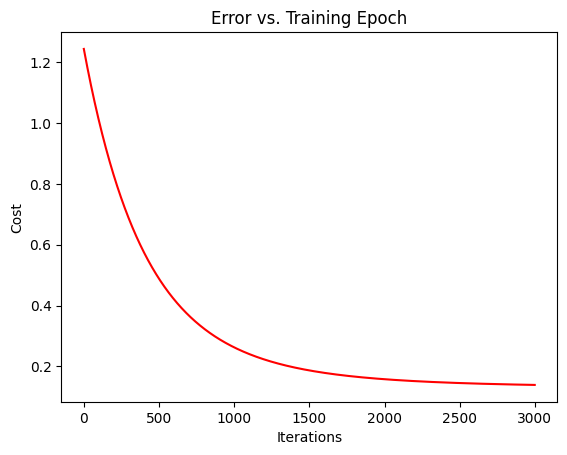

In [53]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), cost_arr, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')